# **DATAET PARA LAS PRACTICAS DE LOS PUNTO 3 Y 4 DEL EXAMEN FINAL**

In [2]:
import pandas as pd
import numpy as np
import requests
import re 
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error


datos = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv",header=None,sep=';',names=['CIC0','SM1_Dz(Z)','GATS1i','NdsCH','NdssC','MLOGP','quantitative response'])
datos.head(9)

,CIC0,SM1_Dz(Z),GATS1i,NdsCH,NdssC,MLOGP,quantitative response
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
5,3.222,0.331,2.177,0,0,0.706,1.819
6,3.179,0.000,1.063,0,0,2.942,3.947
7,3.000,0.000,0.938,1,0,2.851,3.513
8,2.620,0.499,0.990,0,0,2.942,4.402


# **PUNTO 3 EXAMEN FINAL HM_IA**

### **FUNCIONES DESCENSO DE GRADIENTE**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#variables to store mean and standard deviation for each feature
mu = []
std = []

def load_data(filename):
	df = pd.read_csv(filename, sep=",", index_col=False)
	df.columns = ["housesize", "rooms", "price"]
	data = np.array(df, dtype=float)
	plot_data(data[:,:2], data[:, -1])
	normalize(data)
	return data[:,:2], data[:, -1]

def plot_data(x, y):
	plt.xlabel('house size')
	plt.ylabel('price')
	plt.plot(x[:,0], y, 'bo')
	plt.show()

def normalize(data):
	for i in range(0,data.shape[1]-1):
		data[:,i] = ((data[:,i] - np.mean(data[:,i]))/np.std(data[:, i]))
		mu.append(np.mean(data[:,i]))
		std.append(np.std(data[:, i]))


def h(x,theta):
	return np.matmul(x, theta)

def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

def test(theta, x):

	y = theta[0] + theta[1]*x[0] + theta[2]*x[1]
	print("Price of house: ", y)

def normalized(x, xmax, xmin):
  ymax = 1
  ymin = 0

  m = (ymax - ymin) / (xmax - xmin)
  b = ymin - m*xmin

  y = m*x+b
  
  return y

## **MODELO 1 ORIGINAL**

### **CREACION DEL MODELO**

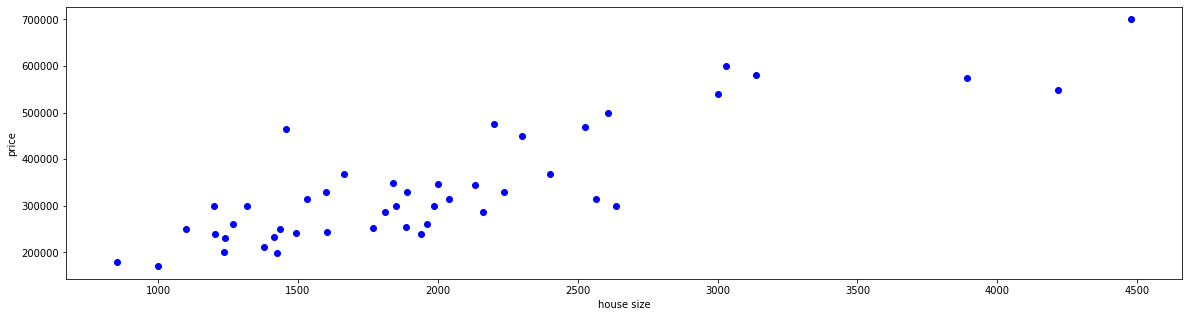

Cost:  [[2.08475311e+09]]
Parameters:  [[ 3.37371711e+05]
 [ 1.04066024e+05]
 [-6.47874139e+01]]


In [ ]:
plt.rcParams['figure.figsize'] = [20, 5]

x1,y1 = load_data("https://raw.githubusercontent.com/kumudlakara/Medium-codes/main/linear_regression/house_price_data.txt")
y = np.reshape(y1, (46,1))
x = np.hstack((np.ones((x1.shape[0],1)), x1))
theta = np.zeros((x.shape[1], 1))
learning_rate = 0.1
num_epochs = 50
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", J)
print("Parameters: ", theta)

### **ENTRENAMIENTO DE LA FUNCION DE COSTO**

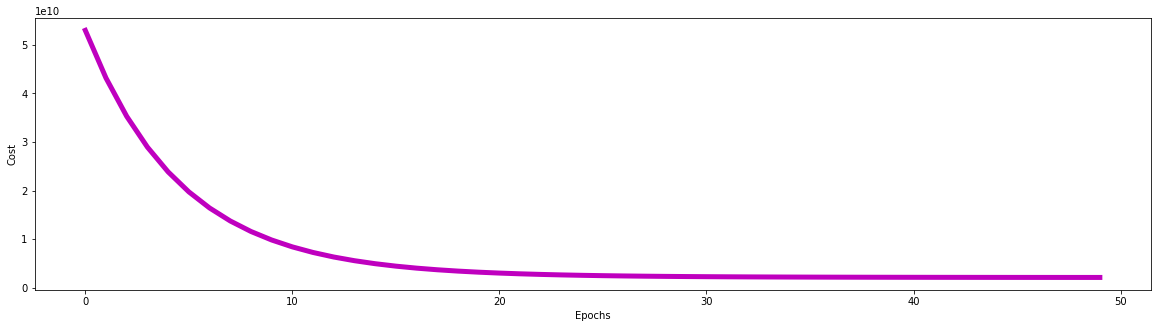

In [ ]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

### **VALIDACION MODELO 1 ORIGINAL**

In [ ]:
Y_pred_modelo1 = np.dot(x,theta)
y_n=np.asarray(normalized(y,np.max(y),np.min(y)))
Y_pred_modelo1_n=np.asarray(normalized(Y_pred_modelo1,np.max(Y_pred_modelo1),np.min(Y_pred_modelo1)))

RMSE = (np.sqrt(mean_squared_error(y_n,Y_pred_modelo1_n)))

regr = LinearRegression()
regr.fit(y_n,Y_pred_modelo1_n)
coef = regr.coef_

print(RMSE)
print(coef)

0.12300623907344257
[[0.79716283]]


## **MODELO ANTERIOR APLICADO AL DATASET SELECCIONADO**

### **CREACION DEL MODELO DE GRADIENTE DECENDENTE**

Cost:  [[0.0049175]]
Parameters:  [[ 0.12072654]
 [ 0.18036226]
 [ 0.26590766]
 [-0.19484062]
 [ 0.14817678]
 [ 0.05989124]
 [ 0.37976587]]


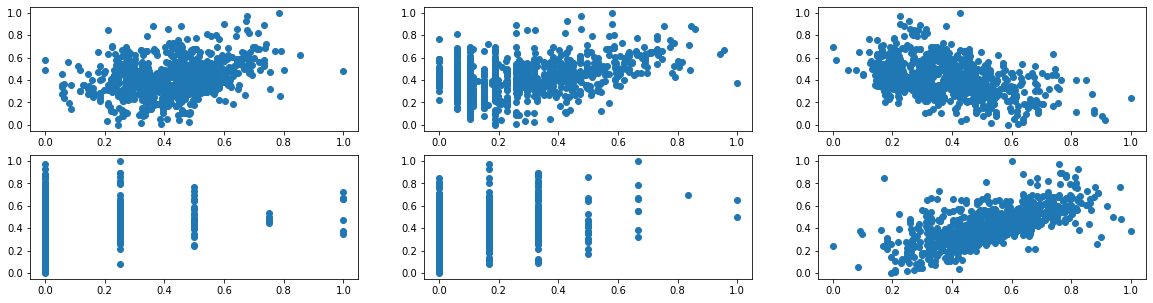

In [ ]:
#Extraccion de datos
X = datos.iloc[:,0:6]
Y = datos.iloc[:,6]
#Normalizacion de los datos, y amuento de dimensionalidad de X
X_n1=np.asarray(normalized(X,np.max(X),np.min(X)))
X_n = np.hstack((np.ones((X_n1.shape[0],1)), X_n1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)
Y_n=np.asarray(normalized(Y_n,np.max(Y_n),np.min(Y_n)))

#plot de graficas de cada entrada vs salida
plt.rcParams['figure.figsize'] = [20, 5]

for i in range(0,(X.shape[1])):
  plt.subplot(2,3,i+1)
  plt.scatter(X_n1[:,i], Y_n)

#variables constantes y calculos del modelo 
theta = np.zeros((X_n.shape[1], 1))
learning_rate = 0.1
num_epochs = 900
theta, J_all = gradient_descent(X_n, Y_n, theta, learning_rate, num_epochs)
J = cost_function(X_n, Y_n, theta)
print("Cost: ", J)
print("Parameters: ", theta)

### **ENTRENAMIENTO DE LA FUNCION DE COSTO**

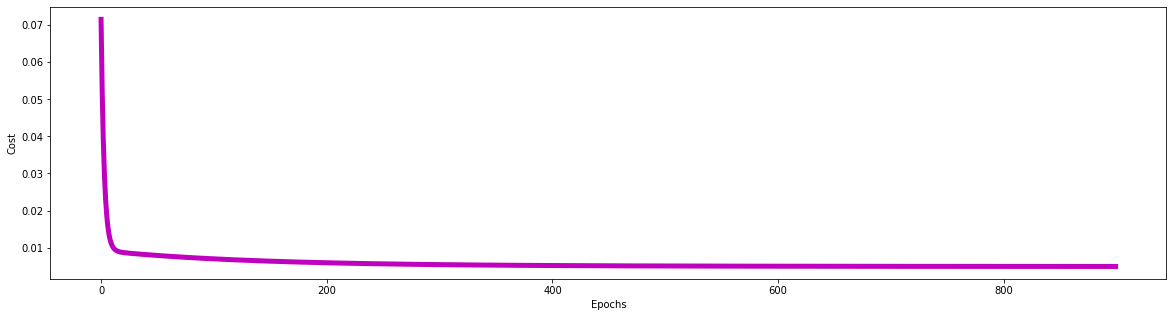

In [ ]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
plot_cost(jplot, n_epochs)

### **VALIDACION MODELO 1 DATASET ELEGIDO**

In [ ]:
Y_pred_modelo2 = np.dot(X_n,theta)
RMSE = (np.sqrt(mean_squared_error(Y_n,Y_pred_modelo2)))

regr = LinearRegression()
regr.fit(Y_n,Y_pred_modelo2)
coef = regr.coef_

print(RMSE)
print(coef)

0.09917152923080635
[[0.55369464]]


## **MODELO UTILIZANDO LINEAR REGRESSION DE LA LIBRERIA SKLEARN**

### **CREACION DEL MODELO DE REGRESION LINEAL**

In [ ]:
#Extraccion de datos
X = datos.iloc[:,0:6]
Y = datos.iloc[:,6]

#Normalizacion de los datos
scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

scaler2 = MinMaxScaler(feature_range=(-1, 1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)

scaler2.fit(Y_n)
Y_n=scaler2.transform(Y_n)
Y_n = np.array(Y_n)

#Division del datoset normalizado
X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.2, random_state=5)

#Entrenamiento del modelo por LinearRegression
linear_model = LinearRegression()

### **ENTRENAMIENTO DEL MODELO LINEAR_REGRESSION**

In [ ]:
linear_model.fit(X_train, Y_train)

LinearRegression()

### **VALIDACION MODELO LINEAR_REGRESSION CON EL DATASET ELEGIDO**

In [ ]:
R2 = linear_model.score(X_test,Y_test)
y_test_predict = linear_model.predict(X_test)
RMSE = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

regr = LinearRegression()
regr.fit(Y_test,y_test_predict)
coef = regr.coef_

print('Rmse ',RMSE)
print(coef)

Rmse  0.19026400833792062
[[0.56235088]]


## **MODELO SGD**

### **CREACION DEL MODELO SGD**

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg = make_pipeline(StandardScaler(),
                    SGDRegressor(max_iter=10000, tol=1e-3))
#SVMreg = svm.SVR(kernel='linear')

In [ ]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=10):
	m = x.shape[0]
	J_all = []
	
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost_ = (1/m)*(x.T@(h_x - y))*(1/(math.sqrt((1/m)*(x.T@(h_x - y))+1)+1e-6))
		theta = theta - (learning_rate)*cost_
		J_all.append(cost_function(x, y, theta))

	return theta, J_all 

### **ENTRENAMIENTO DEL MODELO SGD**

In [ ]:
reg.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('sgdregressor', SGDRegressor(max_iter=10000))])

### **VALIDACION DEL MODELO SGD**

In [ ]:
Y_pred_SGD = reg.predict(X_test)

RMSE = (np.sqrt(mean_squared_error(Y_test, Y_pred_SGD)))
regr = LinearRegression()
regr.fit(Y_test,Y_pred_SGD)
coef = regr.coef_

print('Rmse ',RMSE)
print(coef)

Rmse  0.19023169250678557
[0.56069107]


# **PUNTO 4 EXAMEN FINAL HM_IA**

### **DEFINICION DE FUNCIONES PARA EL DESARROLLO DE LA MLP CON PROPAGRACION DE ERROR HACIA ATRAS**

In [3]:
from sklearn.datasets import make_circles
from sklearn.metrics import accuracy_score
import numpy as np
import math
np.random.seed(0)

# Find a small float to avoid division by zero
epsilon = np.finfo(float).eps

# Sigmoid function and its differentiation
def sigmoid(z):
    return 1/(1+np.exp(-z.clip(-500, 500)))
def dsigmoid(z):
    s = sigmoid(z)
    return 2 * s * (1-s)

# ReLU function and its differentiation
def relu(z):
    return np.maximum(0, z)
def drelu(z):
    return (z > 0).astype(float)

# Loss function L(y, yhat) and its differentiation
def cross_entropy(y, yhat):
    """Binary cross entropy function
        L = - y log yhat - (1-y) log (1-yhat)

    Args:
        y, yhat (np.array): nx1 matrices which n are the number of data instances
    Returns:
        average cross entropy value of shape 1x1, averaging over the n instances
    """
    return -(y.T @ np.log(yhat.clip(epsilon)) + (1-y.T) @ np.log((1-yhat).clip(epsilon))) / y.shape[1]

def d_cross_entropy(y, yhat):
    """ dL/dyhat """
    return - np.divide(y, yhat.clip(epsilon)) + np.divide(1-y, (1-yhat).clip(epsilon))

class mlp:
    '''Multilayer perceptron using numpy
    '''
    def __init__(self, layersizes, activations, derivatives, lossderiv):
        """remember config, then initialize array to hold NN parameters without init"""
        # hold NN config
        self.layersizes = tuple(layersizes)
        self.activations = tuple(activations)
        self.derivatives = tuple(derivatives)
        self.lossderiv = lossderiv
        assert len(self.layersizes)-1 == len(self.activations), \
            "number of layers and the number of activation functions does not match"
        assert len(self.activations) == len(self.derivatives), \
            "number of activation functions and number of derivatives does not match"
        assert all(isinstance(n, int) and n >= 1 for n in layersizes), \
            "Only positive integral number of perceptons is allowed in each layer"
        # parameters, each is a 2D numpy array
        L = len(self.layersizes)
        self.z = [None] * L
        self.W = [None] * L
        self.b = [None] * L
        self.a = [None] * L
        self.dz = [None] * L
        self.dW = [None] * L
        self.db = [None] * L
        self.da = [None] * L

    def initialize(self, seed=42):
        """initialize the value of weight matrices and bias vectors with small random numbers."""
        np.random.seed(seed)
        sigma = 0.1
        for l, (insize, outsize) in enumerate(zip(self.layersizes, self.layersizes[1:]), 1):
            self.W[l] = np.random.randn(insize, outsize) * sigma
            self.b[l] = np.random.randn(1, outsize) * sigma

    def forward(self, x):
        """Feed forward using existing `W` and `b`, and overwrite the result variables `a` and `z`

        Args:
            x (numpy.ndarray): Input data to feed forward
        """
        self.a[0] = x
        for l, func in enumerate(self.activations, 1):
            # z = W a + b, with `a` as output from previous layer
            # `W` is of size rxs and `a` the size sxn with n the number of data instances, `z` the size rxn
            # `b` is rx1 and broadcast to each column of `z`
            self.z[l] = (self.a[l-1] @ self.W[l]) + self.b[l]
            # a = g(z), with `a` as output of this layer, of size rxn
            self.a[l] = func(self.z[l])
        return self.a[-1]

    def backward(self, y, yhat):
        """back propagation using NN output yhat and the reference output y, generates dW, dz, db,
        da
        """
        assert y.shape[1] == self.layersizes[-1], "Output size doesn't match network output size"
        assert y.shape == yhat.shape, "Output size doesn't match reference"
        # first `da`, at the output
        self.da[-1] = self.lossderiv(y, yhat)
        for l, func in reversed(list(enumerate(self.derivatives, 1))):
            # compute the differentials at this layer
            self.dz[l] = self.da[l] * func(self.z[l])
            self.dW[l] = self.a[l-1].T @ self.dz[l]
            self.db[l] = np.mean(self.dz[l], axis=0, keepdims=True)
            self.da[l-1] = self.dz[l] @ self.W[l].T
            assert self.z[l].shape == self.dz[l].shape
            assert self.W[l].shape == self.dW[l].shape
            assert self.b[l].shape == self.db[l].shape
            assert self.a[l].shape == self.da[l].shape

    def update(self, eta):
        """Updates W and b

        Args:
            eta (float): Learning rate
        """
        for l in range(1, len(self.W)):
            self.W[l] -= eta * self.dW[l]
            self.b[l] -= eta * self.db[l]


## **MODELO COPIADO DIRECTAMENTE DE LA PAGINA**

### **CREACION DEL MODELO**

In [4]:
# Make data: Two circles on x-y plane as a classification problem
X, y = make_circles(n_samples=908, factor=0.5, noise=0.1)
y = y.reshape(-1,1) # our model expects a 2D array of (n_sample, n_dim)

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.2, random_state=5)

# Build a model
model = mlp(layersizes=[2, 4, 3, 1],
            activations=[relu, relu, sigmoid],
            derivatives=[drelu, drelu, dsigmoid],
            lossderiv=d_cross_entropy)
model.initialize()
yhat = model.forward(X_train)
print(yhat.shape,X.shape)
loss = cross_entropy(Y_train, yhat)
print("Before training - loss value {} accuracy {}".format(loss, accuracy_score(Y_train, (yhat > 0.5))))

(726, 1) (908, 2)
Before training - loss value [[502.73019238]] accuracy 0.5192837465564738


### **ENTRENAMIENTO DEL MODELO**

In [5]:
# train for each epoch
n_epochs = 20000
learning_rate = 0.0005
for n in range(n_epochs):
    model.forward(X_train)
    yhat = model.a[-1]
    model.backward(Y_train, yhat)
    model.update(learning_rate)
    loss = cross_entropy(Y_train, yhat)
    print("Iteration {} - loss value {} accuracy {}".format(n, loss, accuracy_score(Y_train, (yhat > 0.5))))

Se han truncado las últimas 5000 líneas del flujo de salida.
Iteration 15000 - loss value [[330.27247359]] accuracy 0.7837465564738292
Iteration 15001 - loss value [[333.83486996]] accuracy 0.7727272727272727
Iteration 15002 - loss value [[329.49976156]] accuracy 0.78099173553719
Iteration 15003 - loss value [[331.88478635]] accuracy 0.7713498622589532
Iteration 15004 - loss value [[331.13792869]] accuracy 0.7823691460055097
Iteration 15005 - loss value [[332.23451235]] accuracy 0.7754820936639119
Iteration 15006 - loss value [[329.64967511]] accuracy 0.7851239669421488
Iteration 15007 - loss value [[331.82063417]] accuracy 0.7727272727272727
Iteration 15008 - loss value [[329.67006582]] accuracy 0.7823691460055097
Iteration 15009 - loss value [[332.71922846]] accuracy 0.7754820936639119
Iteration 15010 - loss value [[328.3838659]] accuracy 0.7851239669421488
Iteration 15011 - loss value [[327.27125497]] accuracy 0.7837465564738292
Iteration 15012 - loss value [[329.34135827]] accuracy

### **VALIDACION DEL MODELO LINEAR1**

In [7]:
import numpy as np
Y_pred_linear1 = model.forward(X_test)

regr = LinearRegression()
regr.fit(Y_test,Y_pred_linear1)
coef = regr.coef_
print(coef)

[[0.37063554]]


## **APLICACION DEL MODELO ANTERIORMENTE EXPUESTO EN EL DATASET qsar_fish_toxicity**

### **NORMALIZACION DEL DATASET**

In [ ]:
X = datos.iloc[:,0:6]
Y = datos.iloc[:,6]
X_n=np.asarray(normalized(X,np.max(X),np.min(X)))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)
Y_n=np.asarray(normalized(Y_n,np.max(Y_n),np.min(Y_n)))
Y_n=(Y_n > 0.5).astype('int') 

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.2, random_state=5)

print(X_n.shape,Y_n.shape)

(908, 6) (908, 1)


### **CREACION DEL MODELO A PARTIR DEL ANTERIOR**

In [ ]:
# Build a model
model = mlp(layersizes=[6, 7, 8, 1],
            activations=[relu, relu, sigmoid],
            derivatives=[drelu, drelu, dsigmoid],
            lossderiv=d_cross_entropy)
model.initialize()

yhat = np.asarray(model.forward(X_train))
loss = cross_entropy(Y_train, yhat)
print("Before training - loss value {} accuracy {}".format(loss, accuracy_score(Y_train, (yhat > 0.5))))

Before training - loss value [[490.332445]] accuracy 0.7272727272727273


In [ ]:
# train for each epoch
n_epochs = 50000
learning_rate = 0.0005
for n in range(n_epochs):
    model.forward(X_train)
    yhat = model.a[-1]
    model.backward(Y_train, yhat)
    model.update(learning_rate)
    loss = cross_entropy(Y_train, yhat)
    print("Iteration {} - loss value {} accuracy {}".format(n, loss, accuracy_score(Y_train, (yhat > 1))))

Se han truncado las últimas 5000 líneas del flujo de salida.
Iteration 45000 - loss value [[267.43453182]] accuracy 0.7272727272727273
Iteration 45001 - loss value [[267.66075877]] accuracy 0.7272727272727273
Iteration 45002 - loss value [[267.26310787]] accuracy 0.7272727272727273
Iteration 45003 - loss value [[268.58145157]] accuracy 0.7272727272727273
Iteration 45004 - loss value [[267.64857254]] accuracy 0.7272727272727273
Iteration 45005 - loss value [[267.89637174]] accuracy 0.7272727272727273
Iteration 45006 - loss value [[266.9669122]] accuracy 0.7272727272727273
Iteration 45007 - loss value [[267.82239096]] accuracy 0.7272727272727273
Iteration 45008 - loss value [[267.17238412]] accuracy 0.7272727272727273
Iteration 45009 - loss value [[267.80464727]] accuracy 0.7272727272727273
Iteration 45010 - loss value [[267.26080347]] accuracy 0.7272727272727273
Iteration 45011 - loss value [[268.39389785]] accuracy 0.7272727272727273
Iteration 45012 - loss value [[267.29507455]] accura

### **VALIDACION DEL MODELO MLP**

In [ ]:
Y_pred_linear2 = model.forward(X_test)
regr = LinearRegression()
regr.fit(Y_test,Y_pred_linear2)
coef = regr.coef_
print(coef)

[[0.4266004]]


## **MODELO A PARTIR DE MLP KERAS**

### **DIVISION DEL DATASET Y PREPROCESAMIENTO DE LOS DATOS**

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

X = datos.iloc[:,0:6]
Y = datos.iloc[:,6]

scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

scaler2 = MinMaxScaler(feature_range=(-1, 1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)

scaler2.fit(Y_n)
Y_n=scaler2.transform(Y_n)
Y_n = np.array(Y_n)

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.2, random_state=5)

### **CREACION DEL MODELO MLP**

In [ ]:
from keras.models import Sequential
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from tensorflow.keras.utils import plot_model

model_RL_1 = Sequential()

model_RL_1.add(Dense(6, input_dim=6, activation='relu'))
model_RL_1.add(Dense(4, activation='sigmoid'))
model_RL_1.add(Dense(1, activation='linear'))

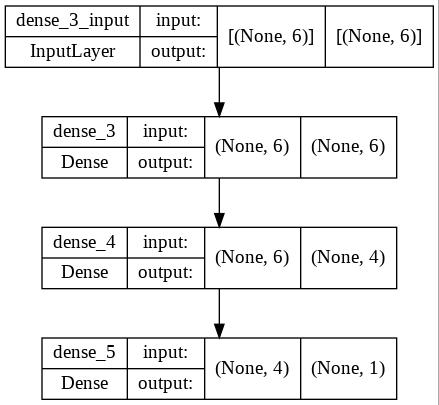

In [ ]:
plot_model(model_RL_1, to_file = 'model.jpg', show_shapes = True)

### **ENTRENAMIENTO DEL MODELO MLP**

In [ ]:
model_RL_1.compile(loss='mean_squared_error',
              optimizer = keras.optimizers.Adam(learning_rate=0.005),
              metrics=['accuracy'])

model_RL_1.fit(X_train, Y_train, epochs=5000)

Se han truncado las últimas 5000 líneas del flujo de salida.
23/23 [==============================] - 0s 2ms/step - loss: 0.0265 - accuracy: 0.0014
Epoch 2502/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.0014
Epoch 2503/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.0014
Epoch 2504/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0266 - accuracy: 0.0014
Epoch 2505/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0264 - accuracy: 0.0014
Epoch 2506/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0269 - accuracy: 0.0014
Epoch 2507/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.0014
Epoch 2508/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0267 - accuracy: 0.0014
Epoch 2509/5000
23/23 [==============================] - 0s 2ms/step - loss: 0.0270 - accuracy: 0.0014
Epoch 2510/5000
23/23 [=====

### **VALIDACION DEL MODELO MLP**

In [ ]:
RMSE = (np.sqrt(mean_squared_error(Y_test, (model_RL_1.predict(X_test)))))
regr = LinearRegression()
regr.fit(Y_test,(model_RL_1.predict(X_test)))
coef = regr.coef_

print((model_RL_1.predict(X_train))[0])
print(RMSE)
print(coef)

[0.04086182]
0.20521056622445075
[[0.66874165]]


## **MODELO A PARTIR DE MLP SKLEARN**

### **DIVISION DEL DATASET Y PREPROCESAMIENTO DE LOS DATOS**

In [ ]:
X = datos.iloc[:,0:6]
Y = datos.iloc[:,6]

scaler1 = MinMaxScaler(feature_range=(-1, 1))
scaler1.fit(X)
X_n=scaler1.transform(X)
X_n = np.array(X_n)

scaler2 = MinMaxScaler(feature_range=(-1, 1))
Y_n = Y.values
Y_n = Y_n.reshape(-1,1)

scaler2.fit(Y_n)
Y_n=scaler2.transform(Y_n)
Y_n = np.array(Y_n)

X_train, X_test, Y_train, Y_test = train_test_split(X_n, Y_n, test_size = 0.2, random_state=5)

### **CREACION DEL MODELO DE SKLEARN**

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.neural_network import MLPRegressor
import time

print("Training MLPRegressor...")
model_skl = make_pipeline(
    QuantileTransformer(),
    MLPRegressor(
        hidden_layer_sizes=(10, 8,5),
        learning_rate_init=0.01,
        early_stopping=True,
        random_state=0,
    ),
)

Training MLPRegressor...


### **ENTRENAMIENTO DEL MODELO**

In [ ]:
model_skl.fit(X_train, Y_train)
y_pred_skl_MLP = model_skl.predict(X_test)
print(y_pred_skl_MLP.shape)

(182,)


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:2593: UserWarning: n_quantiles (1000) is greater than the total number of samples (726). n_quantiles is set to n_samples.
  "n_samples." % (self.n_quantiles, n_samples)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


### **VALIDACION DEL MODELO DE SKLEARN**

In [ ]:
regr = LinearRegression()
regr.fit(Y_test,y_pred_skl_MLP)
coef = regr.coef_
print(coef)


[0.59506617]
